In [3]:
import os
import MDAnalysis as mda
import numpy as np
import matplotlib as mpl
import MDAnalysis.analysis.rms as rms
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
def OP_proc(traj, list_name = "d", top = "2jln_r10_g470_c22.psf"):
    u = mda.Universe(top, traj)

    d1 = []
    d2 = []
    d3 = []
    print "Tabulating gate distances..."
    for ts in u.trajectory:
        b_ec = u.select_atoms("resid 38:40") #select bundle for ec_thin comparison
        ec_thin = u.select_atoms("resid 351:353") #select extracellular thin gate
        b_ic = u.select_atoms("resid 152:154") #sic
        ic_thin = u.select_atoms("resid 220:222") #select intracellular thin gate
        b_tg = u.select_atoms("resid 29 or resid 32") #sic
        thick = u.select_atoms("resid 300 or resid 303:304") #select thick gate

        d1_a = abs(b_ec.center_of_mass() - ec_thin.center_of_mass())
        d2_a = abs(b_ic.center_of_mass() - ic_thin.center_of_mass())
        d3_a = abs(b_tg.center_of_mass() - thick.center_of_mass())
        d1_b = np.linalg.norm(d1_a)
        d2_b = np.linalg.norm(d2_a)
        d3_b = np.linalg.norm(d3_a)

        d1.append(d1_b) #Ec_thin
        d2.append(d2_b) #Ic_thin
        d3.append(d3_b) #Thick Gate
        
    print "Lists populated"
    return d1, d2, d3

In [25]:
def plt_gates(path_ID = "i2occ2o"):
    fig = plt.figure(figsize = (8,5))
    ax = fig.add_subplot(111)
    ax.plot(d1, 'k-', label = "Extracellular")
    ax.plot(d2, 'b-', label = "Intracellular")
    ax.plot(d3, 'r-', label = "Thick")
    box = ax.get_position()
    ax.set_title('Gate Order Parameters')
    ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_ylim([0, 25])
    ax.set_xlabel("timestep")
    ax.set_ylabel(r"Distance to Bundle ($\AA$)")
    fig.savefig("mhp1_gate_tseries_" + path_ID + "_mhp1.pdf")
    

Tabulating gate distances...
Lists populated


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


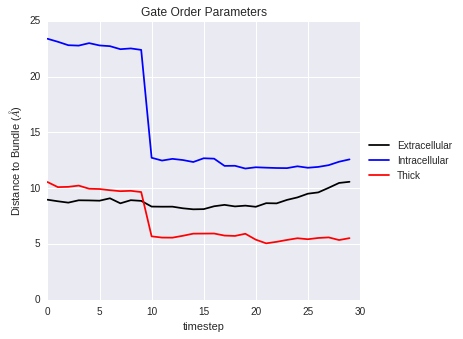

In [24]:
d1, d2, d3 = OP_proc("full_dims_mhp1_i2occ2o.dcd")
plt_gates()